# Word Embeddings

fun: [0.84621066 0.74513762]
is: [ 1.21838357 -0.10150462]
things: [0.7996182  0.62647327]
machine: [2.0744576  1.42666215]
enjoy: [1.1463062 0.6897958]
new: [1.00527394 0.21711898]
i: [ 1.58571908 -0.17002625]
love: [1.38006334 0.23932804]
learning: [ 2.65210622 -1.89925147]


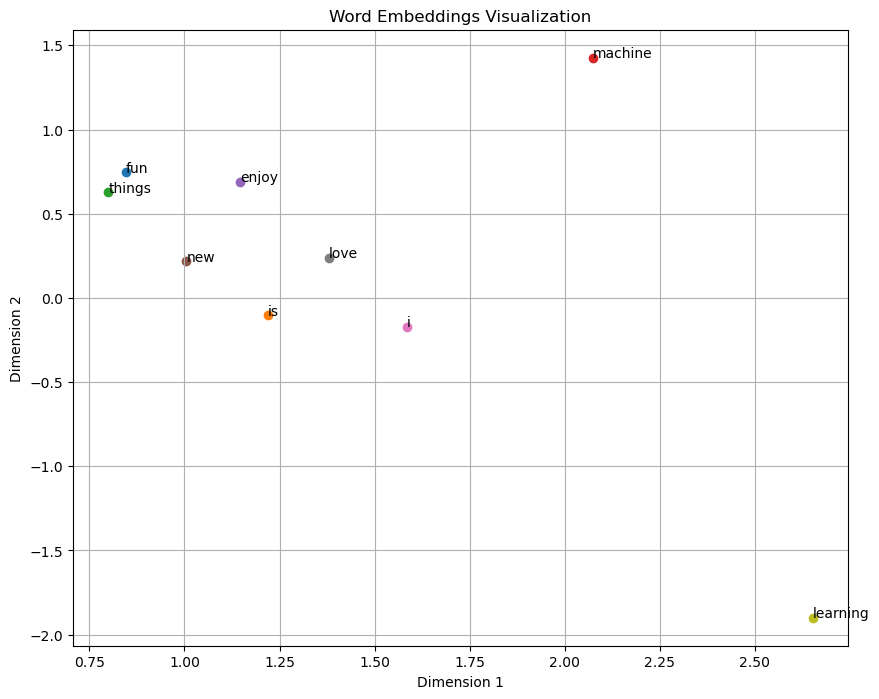

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from collections import defaultdict

def build_cooccurrence_matrix(corpus, window_size=2):
    cooccurrence_matrix = defaultdict(int)
    vocab = set()

    for sentence in corpus:
        for i, target_word in enumerate(sentence):
            vocab.add(target_word)
            context_words = sentence[max(0, i - window_size): i] + sentence[i + 1: i + 1 + window_size]
            for context_word in context_words:
                cooccurrence_matrix[(target_word, context_word)] += 1
                vocab.add(context_word)

    vocab = list(vocab)
    return cooccurrence_matrix, vocab

def build_word_context_matrix(cooccurrence_matrix, vocab):
    word_index = {word: i for i, word in enumerate(vocab)}
    matrix_size = len(vocab)
    word_context_matrix = np.zeros((matrix_size, matrix_size))

    for (target_word, context_word), count in cooccurrence_matrix.items():
        target_idx = word_index[target_word]
        context_idx = word_index[context_word]
        word_context_matrix[target_idx, context_idx] = count

    return word_context_matrix

def apply_svd(matrix, n_components=2):
    svd = TruncatedSVD(n_components=n_components)
    word_embeddings = svd.fit_transform(matrix)
    return word_embeddings

def plot_embeddings(word_embeddings, vocab):
    plt.figure(figsize=(10, 8))
    for i, word in enumerate(vocab):
        plt.scatter(word_embeddings[i, 0], word_embeddings[i, 1])
        plt.annotate(word, (word_embeddings[i, 0], word_embeddings[i, 1]))
    plt.title("Word Embeddings Visualization")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True)
    plt.show()

# Example usage
corpus = [
    ["i", "love", "machine", "learning"],
    ["machine", "learning", "is", "fun"],
    ["i", "enjoy", "learning", "new", "things"]
]

cooccurrence_matrix, vocab = build_cooccurrence_matrix(corpus, window_size=2)
word_context_matrix = build_word_context_matrix(cooccurrence_matrix, vocab)
word_embeddings = apply_svd(word_context_matrix, n_components=2)

# Display the word embeddings
for word, embedding in zip(vocab, word_embeddings):
    print(f"{word}: {embedding}")

# Plot the word embeddings
plot_embeddings(word_embeddings, vocab)
